In [22]:
import pandas as pd
bike_data_raw = pd.read_csv('daily-bike-share.csv')
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
bike_data = bike_data_raw.copy()
bike_data.drop(['instant', 'dteday', 'yr'], axis=1, inplace=True)
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit']
target = 'rentals'
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['atemp'], axis=1, inplace=True)
numeric_features = ['temp', 'difference_temp', 'hum', 'windspeed']

In [23]:
print(f'Numeric features: {numeric_features}')
print(f'Categorical features: {categorical_features}')
print(f'Target: {target}')
display(bike_data)

Numeric features: ['temp', 'difference_temp', 'hum', 'windspeed']
Categorical features: ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
Target: rentals


,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals,difference_temp
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,331,0.056537
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,131,-0.026794
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,120,-0.035439
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,108,0.060610
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,82,0.010191
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.652917,0.350133,247,-0.108295
727,1,12,0,5,1,2,0.253333,0.590000,0.155471,644,0.006762
728,1,12,0,6,0,2,0.253333,0.752917,0.124383,159,-0.043157
729,1,12,0,0,0,1,0.255833,0.483333,0.350754,364,-0.094331


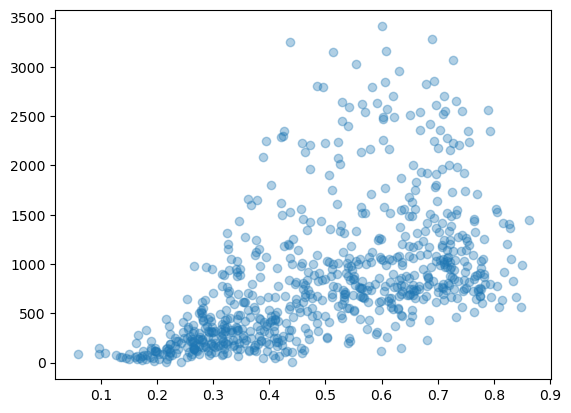

In [24]:
X = bike_data[['temp']].copy()
y = bike_data[target].copy()
import matplotlib.pyplot as plt
plt.scatter(X, y, alpha=0.35)
plt.show()

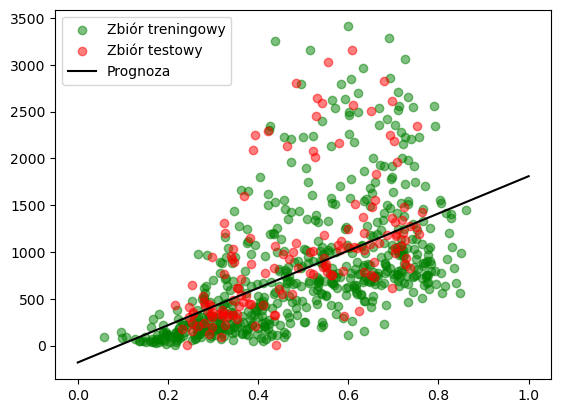

In [25]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, shuffle=False)
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression() # inicjalizacja modelu
lr_model.fit(X_train1, y_train1) # trenowanie modelu
import numpy as np
X_linspace = np.linspace(0, 1, 100)
y_fitted = lr_model.intercept_ + lr_model.coef_ * X_linspace

# Rysowanie wykresu
plt.scatter(X_train1, y_train1, color='green', alpha=0.5, label='Zbiór treningowy')
plt.scatter(X_test1, y_test1, color='red', alpha=0.5, label='Zbiór testowy')
plt.plot(X_linspace, y_fitted, color='black', label='Prognoza')
plt.legend(loc='upper left')

plt.show()

In [26]:
y_predict_train_1 = lr_model.predict(X_train1)
y_predict_test_1 = lr_model.predict(X_test1)

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt
print(f'Train R^2: {r2_score(y_train, y_predict_train_1)}')
print(f'Train MAE: {mean_absolute_error(y_train, y_predict_train_1)}')
print(f'Test MAE: {mean_absolute_error(y_test, y_predict_test_1)}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, y_predict_train_1)}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, y_predict_test_1)}')
print(f'Train MSE: {mean_squared_error(y_train, y_predict_train_1)}')
print(f'Test MSE: {mean_squared_error(y_test, y_predict_test_1)}')
print(f'Train RMSE: {sqrt(mean_squared_error(y_train, y_predict_train_1))}')
print(f'Test RMSE: {sqrt(mean_squared_error(y_test, y_predict_test_1))}')

Train R^2: 0.30617863454631333
Train MAE: 404.83395997526156
Test MAE: 391.02879410802956
Train MAPE: 0.9668581511778541
Test MAPE: 2.986492531856051
Train MSE: 317745.9412425235
Test MSE: 397066.9447179113
Train RMSE: 563.6895787953894
Test RMSE: 630.1324818781454


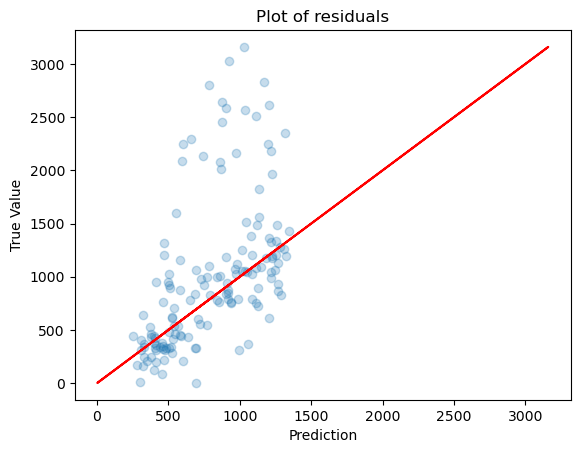

In [47]:
plt.scatter(x = y_predict_test_1, y = y_test1, alpha=0.25)
plt.plot(y_test, y_test, color="r")
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title(f'Plot of residuals')
plt.show()

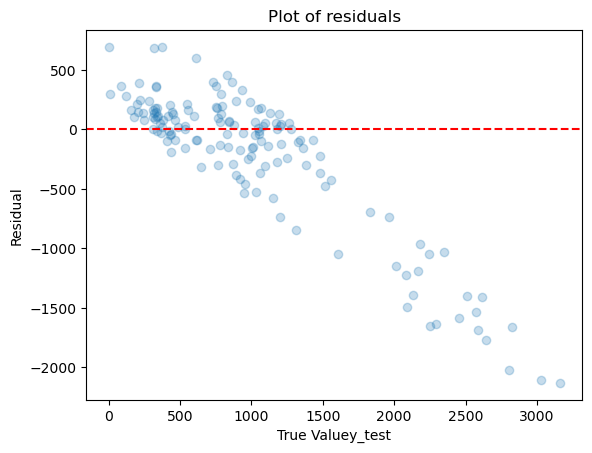

In [45]:
errors = y_predict_test_1 - y_test1
plt.scatter(x = y_test1, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

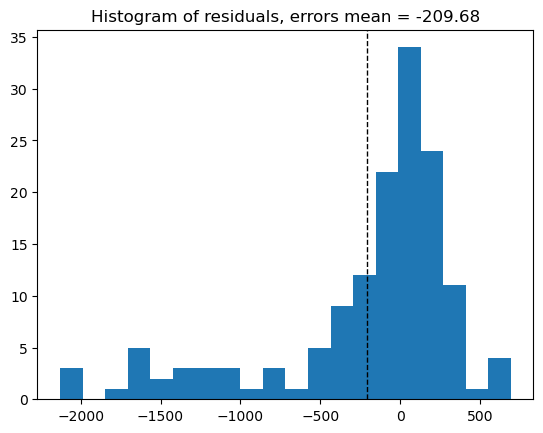

In [30]:
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

In [31]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
cv = KFold(n_splits=5, shuffle=False)
# Podział na zmienne objaśniające i zmienną objaśnianą
X = bike_data[numeric_features+categorical_features].copy()
y = bike_data[target].copy()

# Podział na zbiór treningowy i testowy (taki sam podział co poprzednio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
numeric_transformer = Pipeline(steps=[
    ('logtransformer', PowerTransformer()),
    ('standardscaler', StandardScaler()),
    ('polynomialfeatures', PolynomialFeatures())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Tworzenie końcowego Pipeline, który będziemy trenować
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', ElasticNet())])

params = {'preprocessor__num__polynomialfeatures__degree': [1, 2, 3, 4, 5],
          'regressor__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0],
          'regressor__l1_ratio': np.arange(0, 1.1, 0.1)}

final_polynomial_regression_gridsearch = GridSearchCV(final_pipeline,
                                                      params,
                                                      scoring='neg_mean_squared_error',
                                                      cv=cv)

final_polynomial_regression_gridsearch.fit(X_train, y_train)
print("\nNajlepsze hiperparametry:", final_polynomial_regression_gridsearch.best_params_, "\n")

final_polynomial_regression_model = final_polynomial_regression_gridsearch.best_estimator_
predictions = final_polynomial_regression_model.predict(X_test)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')

E:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.169e+07, tolerance: 2.207e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
E:\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.884e+07, tolerance: 2.268e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV in


Najlepsze hiperparametry: {'preprocessor__num__polynomialfeatures__degree': 1, 'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.4} 

RMSE: 483.9379414050112


In [38]:
y_predict_train = final_polynomial_regression_model.predict(X_train)

print(f'Train R^2 dla pierwszego modelu: {r2_score(y_train, y_predict_train_1)}, Train R^2 dla drugiego modelu: {r2_score(y_train, y_predict_train)}')
print(f'Train MAE dla pierwszego modelu: {mean_absolute_error(y_train, y_predict_train_1)}, Train MAE dla drugiego modelu: {mean_absolute_error(y_train, y_predict_train)}')
print(f'Test MAE dla pierwszego modelu: {mean_absolute_error(y_test, y_predict_test_1)}, Test MAE dla drugiego modelu: {mean_absolute_error(y_test, predictions)}')
print(f'Train MAPE dla pierwszego modelu: {mean_absolute_percentage_error(y_train, y_predict_train_1)},Train MAPE dla drugiego modelu: {mean_absolute_percentage_error(y_train, y_predict_train)}')
print(f'Test MAPE dla pierwszego modelu: {mean_absolute_percentage_error(y_test, y_predict_test_1)},Test MAPE dla drugiego modelu: {mean_absolute_percentage_error(y_test, predictions)}')
print(f'Train MSE dla pierwszego modelu: {mean_squared_error(y_train, y_predict_train_1)},Train MSE dla drugiego modelu: {mean_squared_error(y_train, y_predict_train)}')
print(f'Test MSE dla pierwszego modelu: {mean_squared_error(y_test, y_predict_test_1)},Test MSE dla drugiego modelu: {mean_squared_error(y_test, predictions)}')
print(f'Train RMSE dla pierwszego modelu: {sqrt(mean_squared_error(y_train, y_predict_train_1))},Train RMSE dla drugiego modelu: {sqrt(mean_squared_error(y_train, y_predict_train))}')
print(f'Test RMSE dla pierwszego modelu:  {sqrt(mean_squared_error(y_test, y_predict_test_1))},Test RMSE dla drugiego modelu: {sqrt(mean_squared_error(y_test, predictions))}')
print('Drugi model ma zdecydowanie lepsze parametry, wyższe R^2, niższy średni błąd absolutny i procentowy a także wyraźnie niższe RMSE')

Train R^2 dla pierwszego modelu: 0.30617863454631333, Train R^2 dla drugiego modelu: 0.7010738030778285
Train MAE dla pierwszego modelu: 404.83395997526156, Train MAE dla drugiego modelu: 261.29842739830866
Test MAE dla pierwszego modelu: 391.02879410802956, Test MAE dla drugiego modelu: 348.5851935515566
Train MAPE dla pierwszego modelu: 0.9668581511778541,Train MAPE dla drugiego modelu: 0.7443187889204681
Test MAPE dla pierwszego modelu: 2.986492531856051,Test MAPE dla drugiego modelu: 0.859331973002823
Train MSE dla pierwszego modelu: 317745.9412425235,Train MSE dla drugiego modelu: 136897.75284013434
Test MSE dla pierwszego modelu: 397066.9447179113,Test MSE dla drugiego modelu: 234195.93113132005
Train RMSE dla pierwszego modelu: 563.6895787953894,Train RMSE dla drugiego modelu: 369.99696328501716
Test RMSE dla pierwszego modelu:  630.1324818781454,Test RMSE dla drugiego modelu: 483.9379414050112
Drugi model ma zdecydowanie lepsze parametry, wyższe R^2, niższy średni błąd absolutn

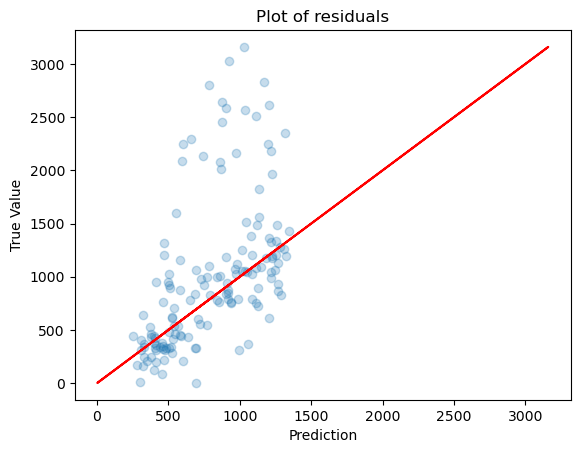

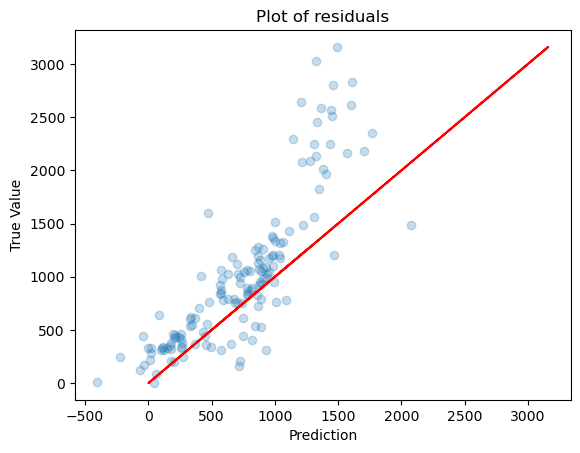

Drugi model zdecydowanie mniej odbiega od wartości rzeczywistych, nie jest idealnie (dla wysokich wartości), ale widać zdecydowaną poprawę
Należy zaznaczyć, że model drugi przewiduje ujemne wartości wypożyczeń, co nie ma logicznego sensu 


In [51]:


plt.scatter(x = y_predict_test_1, y = y_test1, alpha=0.25)
plt.plot(y_test, y_test, color="r")
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title(f'Plot of residuals')
plt.show()

plt.scatter(x = predictions, y = y_test, alpha=0.25)
plt.plot(y_test, y_test, color="r")
plt.xlabel('Prediction')
plt.ylabel('True Value')
plt.title(f'Plot of residuals')
plt.show()
print('Drugi model zdecydowanie mniej odbiega od wartości rzeczywistych, nie jest idealnie (dla wysokich wartości), ale widać zdecydowaną poprawę')
print('Należy zaznaczyć, że model drugi przewiduje ujemne wartości wypożyczeń, co nie ma logicznego sensu ')

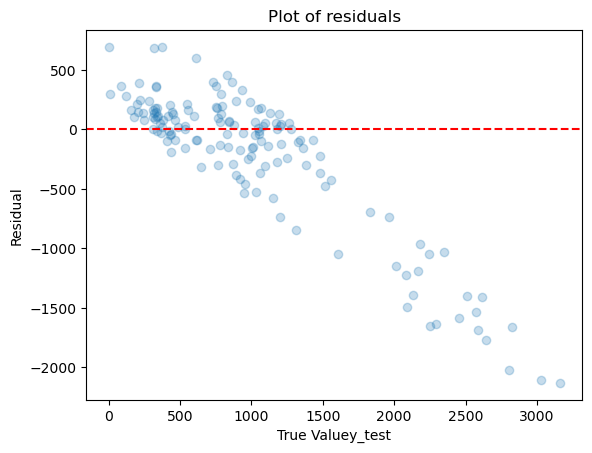

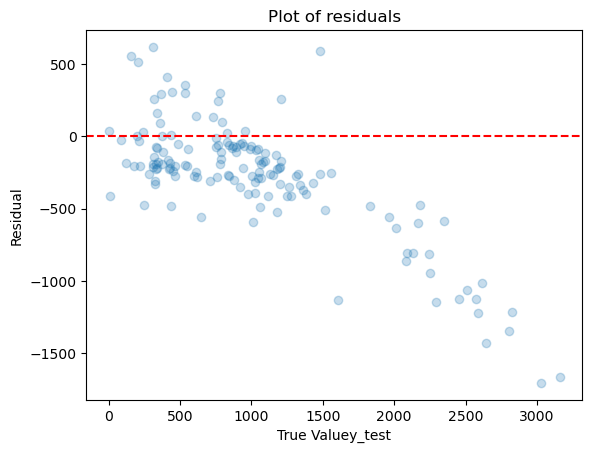

Wartości błędów zdecydowanie bardziej przypominają szum dla drugiego modelu - choć tylko dla niskich wartości, dla wysokich ciągle jest widoczny trend


In [50]:
errors = y_predict_test_1 - y_test1
plt.scatter(x = y_test1, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()


errors = predictions - y_test
plt.scatter(x = y_test, y = errors, alpha=0.25)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel('True Valuey_test')
plt.ylabel('Residual')
plt.title(f'Plot of residuals')
plt.show()

print('Wartości błędów zdecydowanie bardziej przypominają szum dla drugiego modelu - choć tylko dla niskich wartości, dla wysokich ciągle jest widoczny trend')

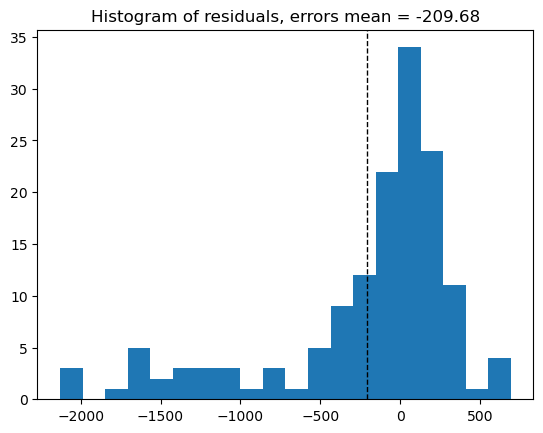

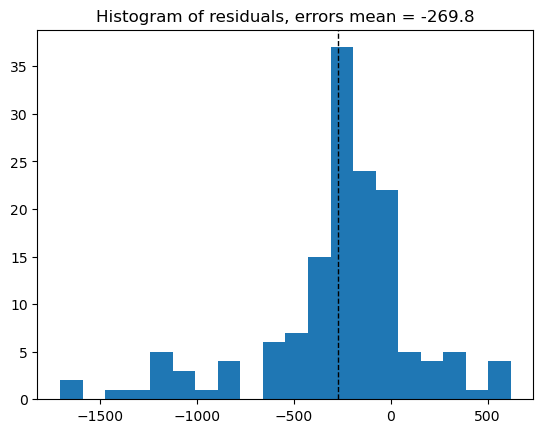

Dla drugiego modelu średnia reszt jest bardziej przesunięta względem zera niż dla pierwszego, model drugi jest jednak bardziej symetryczny względem średniej


In [53]:


errors = y_predict_test_1 - y_test1
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()


errors = predictions - y_test
plt.hist(errors, bins = 20)
plt.axvline(errors.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f'Histogram of residuals, errors mean = {np.round(errors.mean(), 2)}')
plt.show()

print('Dla drugiego modelu średnia reszt jest bardziej przesunięta względem zera niż dla pierwszego, model drugi jest jednak bardziej symetryczny względem średniej')